In [1]:
from array import *
from scipy.integrate import odeint
import scipy.integrate as integrate
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation
import matplotlib
from IPython import display
from scipy.integrate import solve_ivp
matplotlib.use("QtAgg")
%matplotlib notebook
plt.rcParams['animation.ffmpeg_path'] ='C:/FFmpeg/bin/ffmpeg'
m1=1
m2=1
l1=1
l2=1
lc1=0.5
lc2=0.5
q1=0
q2=0
I1=(m1*l1*l1)/12
I2=(m2*l2*l2)/12
g=9.81
t1=0.2
t2=0.5

In [2]:
def derivative(Q,t):
    q1=Q[0]
    q2=Q[1]
    dq1=Q[2]
    dq2=Q[3]
    t1=Q[4]
    t2=Q[5]
    E=t1*dq1+t2*dq2
    d1=m1*lc1**2+I1+m2*(l1**2+lc2**2+2*l1*lc2*math.cos(q2))+I2
    d2=m2*(l1*lc2*math.cos(q2)+lc2**2)+I2
    d3=d2
    d4=m2*lc2**2+I2
    h=-m2*l1*lc2*math.sin(q2)
    phi1=(m1*lc1+m2*l1)*g*math.cos(q1)+m2*lc2*g*math.cos(q1+q2)
    phi2=m2*lc2*g*math.cos(q1+q2)
    k1=t1-phi1-2*h*dq1*dq2-h*dq2**2
    k2=t2-phi2+h*dq1**2
    ddq2=(d3*k1-d1*k2)/(d3*d2-d1*d4)
    ddq1=(d4*k1-d2*k2)/(d4*d1-d2*d3) 
    return [dq1,dq2,ddq1,ddq2,t1,t2,E]

In [3]:
Q=[0,0,0,0,0,0,0]

In [4]:
t=np.linspace(0,10,600)
x= odeint(derivative,y0=Q,t=t)

In [5]:
q1=x[:,0]
q2=x[:,1]
dq1=x[:,2]
dq2=x[:,3]
E1=x[:,6]

<IPython.core.display.Javascript object>


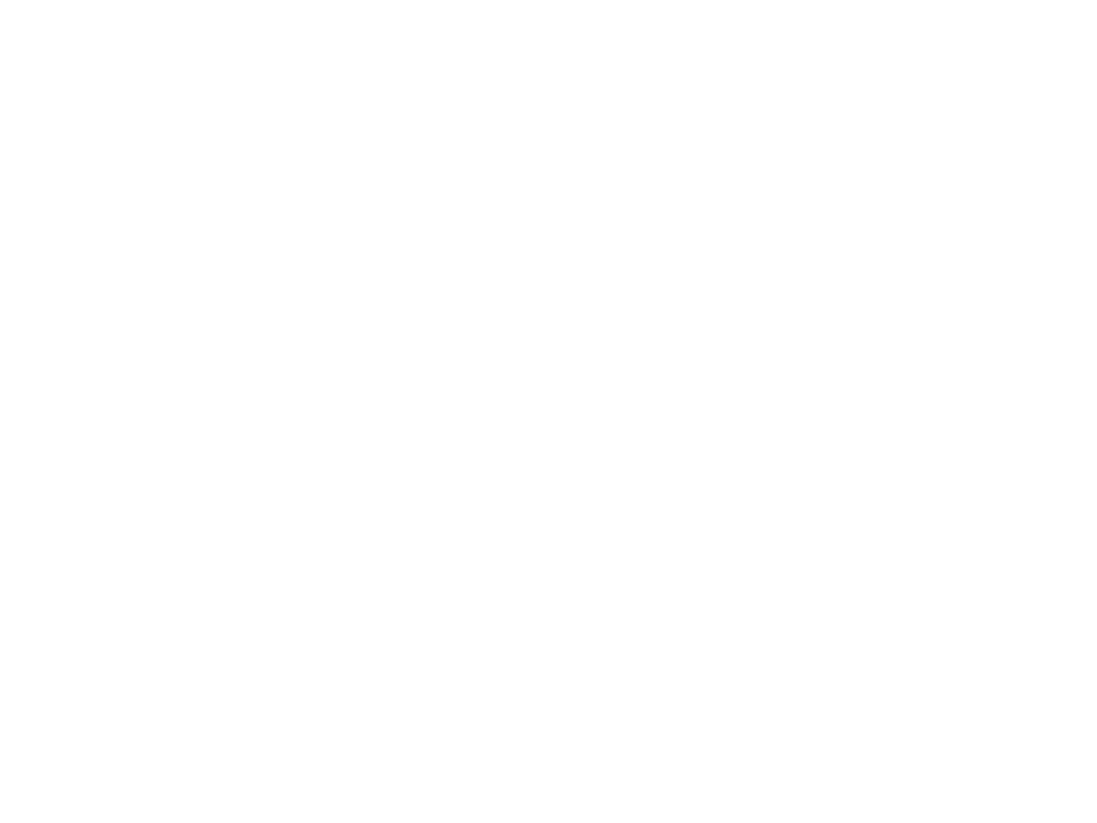

In [6]:
fig = plt.figure()
  
# labeling the x-axis and y-axis
axis = plt.axes(xlim=(-3,3),  ylim=(-3,3))
plt.xlabel("x-distance(m)")
plt.ylabel("y-distance(m)")
# lists storing x and y values
x, y = [], []
  
line, = axis.plot(0, 0)  
line1, = axis.plot(0,0)  
def animate(frame_number):
    x=[0,l1*math.cos(q1[frame_number]),l1*math.cos(q1[frame_number])+l2*math.cos(q1[frame_number]+q2[frame_number])]
    y=[0,l1*math.sin(q1[frame_number]),l1*math.sin(q1[frame_number])+l2*math.sin(q1[frame_number]+q2[frame_number])]
    line.set_xdata([0,x[1]])
    line.set_ydata([0,y[1]])
    line1.set_data([x[1],x[2]],[y[1],y[2]])
    line1.set_color('r')
    return line,


In [7]:
anim = animation.FuncAnimation(fig, animate,frames=600,interval=20)
fig.suptitle('fall\ninitial-zero angular velocity,constant torques given in both links', fontsize=14)
# saving to m4 using ffmpeg writer
writervideo = animation.FFMpegWriter(fps=60)
anim.save('fall with torque.mp4', writer=writervideo)
plt.close()

Traceback (most recent call last):
  File "C:\Users\Ayush\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\cbook\__init__.py", line 304, in process
    func(*args, **kwargs)
  File "C:\Users\Ayush\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\matplotlib\animation.py", line 916, in _stop
    self.event_source.remove_callback(self._step)
AttributeError: 'NoneType' object has no attribute 'remove_callback'


In [8]:
t0=0
E=[]
E2=[]
while(t0<600):
    
    vy = dq1[t0]*(lc2*math.cos(q1[t0]+q2[t0])+l1*math.cos(q1[t0]))+dq2[t0]*lc2*math.cos(q1[t0]+q2[t0])
    vx=-(dq1[t0]*(lc2*math.sin(q1[t0]+q2[t0])+l1*math.sin(q1[t0]))+dq2[t0]*lc2*math.sin(q1[t0]+q2[t0]))
    K=I1*dq1[t0]**2*0.5+m1*lc1**2*0.5*dq1[t0]**2+m2*0.5*(vx**2+vy**2)+I2*0.5*(dq1[t0]+dq2[t0])**2
    P=m1*g*lc1*math.sin(q1[t0])+m2*g*(l1*math.sin(q1[t0])+lc2*math.sin(q1[t0]+q2[t0]))
    E.append(K+P)
    E2.append(E[t0]-E1[t0])
    t0+=1



<IPython.core.display.Javascript object>


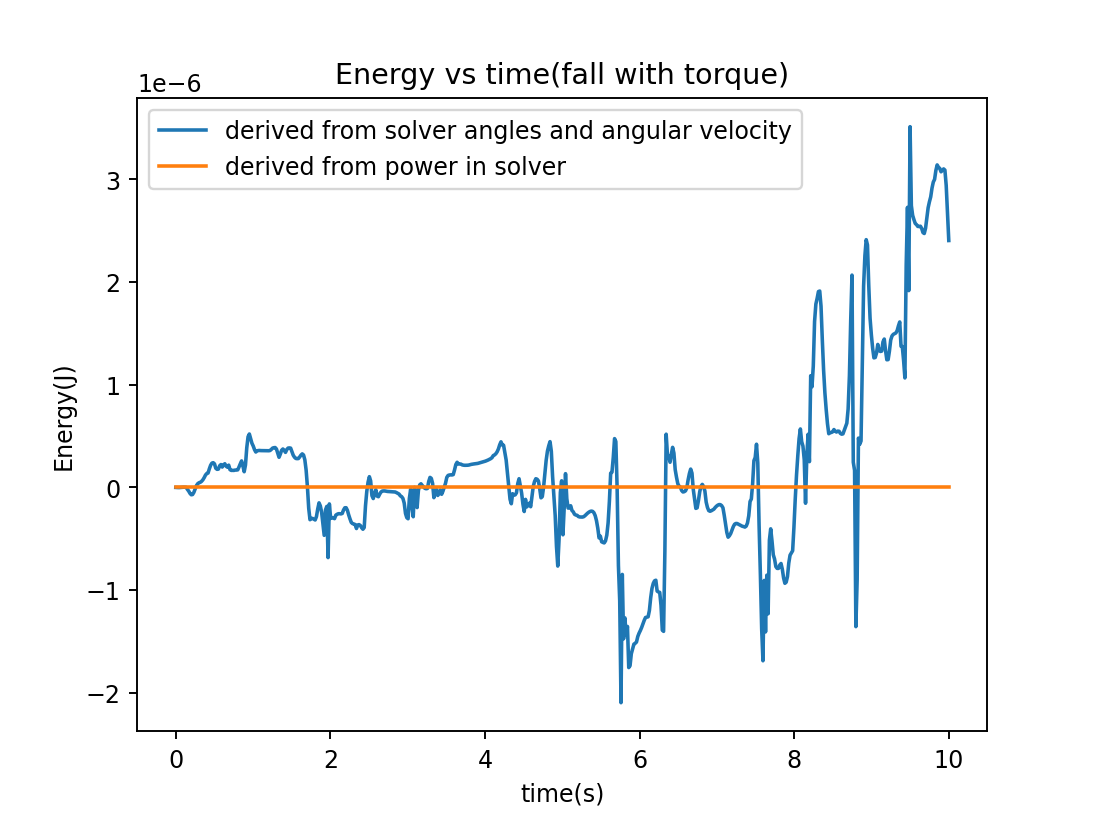

In [11]:
fig1=plt.figure()
plt.xlabel('time(s)')
plt.ylabel('Energy(J)')
plt.title('Energy vs time(fall with torque)',)
plt.plot(t,E,label='derived from solver angles and angular velocity')
plt.plot(t,E1,label='derived from power in solver')
plt.legend(loc="best")

<IPython.core.display.Javascript object>


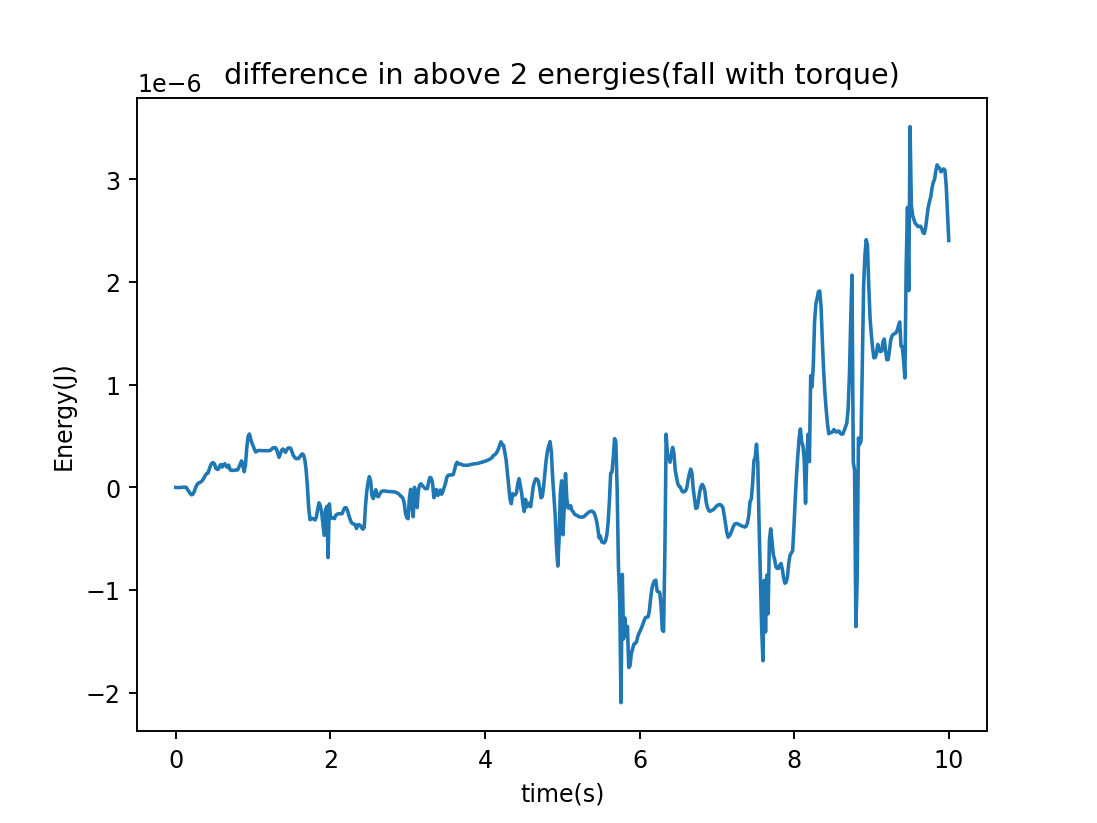

In [10]:
fig2=plt.figure()
plt.xlabel('time(s)')
plt.ylabel('Energy(J)')
plt.title('difference in above 2 energies(fall with torque)',)
plt.plot(t,E2)